<a href="https://colab.research.google.com/github/saurabhdaund76/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML projects/default of credit card clients.csv')

In [4]:
df.head() # column names are not proper lets replace them by 0th row 

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [5]:
df.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

In [6]:
# here 1st row will be taken as header
df.columns = df.iloc[0]
df = df.reindex(df.index.drop(0)).reset_index(drop=True)


In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df.isna().sum()

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,10,10,22723,22346,22026,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,22284,50000,2,2,2,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,16286,2008,2506,2870,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [8]:
# lets drop ID as it wont help us anymore
df = df.drop('ID' , axis=1)

In [9]:
df.shape

(30000, 24)

In [10]:
# renaming the target variable
df.rename(columns = {'default payment next month':'default_payment'} ,inplace=True )

In [11]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [12]:
# for better conviniance lets change the columns names  of pay 0,1,2 etc and bill amt 1,2,3 to original meanings
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':
                   'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG',
                   'BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL',
                   'PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [13]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [14]:
df = df.astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   LIMIT_BAL        30000 non-null  int64
 1   SEX              30000 non-null  int64
 2   EDUCATION        30000 non-null  int64
 3   MARRIAGE         30000 non-null  int64
 4   AGE              30000 non-null  int64
 5   PAY_SEPT         30000 non-null  int64
 6   PAY_AUG          30000 non-null  int64
 7   PAY_JUL          30000 non-null  int64
 8   PAY_JUN          30000 non-null  int64
 9   PAY_MAY          30000 non-null  int64
 10  PAY_APR          30000 non-null  int64
 11  BILL_AMT_SEPT    30000 non-null  int64
 12  BILL_AMT_AUG     30000 non-null  int64
 13  BILL_AMT_JUL     30000 non-null  int64
 14  BILL_AMT_JUN     30000 non-null  int64
 15  BILL_AMT_MAY     30000 non-null  int64
 16  BILL_AMT_APR     30000 non-null  int64
 17  PAY_AMT_SEPT     30000 non-null  int64
 18  PAY_AM

In [15]:
df = df.drop_duplicates()

In [16]:
col = df.describe().columns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


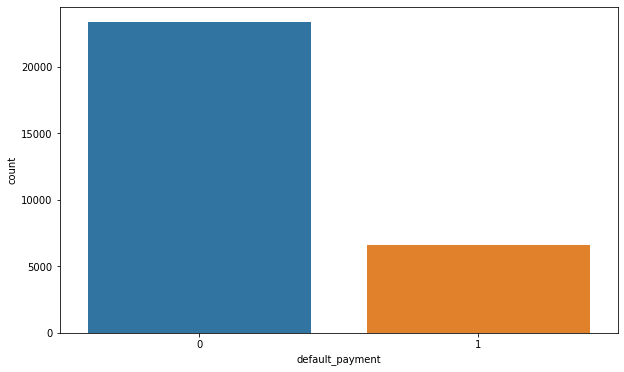

In [ ]:
# 1st lets look at dependent variable 
plt.figure(figsize=(10,6))
sns.countplot(df['default_payment'] , data=df)

* 0- non_default
* 1- default


In [ ]:
df['default_payment'].value_counts(normalize=True)

0    0.778742
1    0.221258
Name: default_payment, dtype: float64

We can clearly see that data is hugely imbalance

In [17]:
not_fraud = df[df['default_payment']==0]
fraud = df[df['default_payment']== 1]

In [18]:
print(not_fraud.shape,fraud.shape)

(23335, 24) (6630, 24)


In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


* Gender (1 = male; 2 = female).
* Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* Marital status (1 = married; 2 = single; 3 = others).

Out of independent variables these are some of the categorical variables

In [ ]:
df['EDUCATION'].value_counts()

2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

As we can see we dont have any information given for 5,6,0 so we will add them into others

In [19]:
df['EDUCATION'] = df['EDUCATION'].replace({5:4,6:4,0:4})
df['EDUCATION'].value_counts()

2    14019
1    10563
3     4915
4      468
Name: EDUCATION, dtype: int64

In [ ]:
# lets look into marriage status
df['MARRIAGE'].value_counts()

2    15945
1    13643
3      323
0       54
Name: MARRIAGE, dtype: int64

In [20]:
# as here also 0 is not described we will add it to 3 ie others

df['MARRIAGE'] = df['MARRIAGE'].replace({0:3})
df['MARRIAGE'].value_counts()

2    15945
1    13643
3      377
Name: MARRIAGE, dtype: int64

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


**Univariate And Bivariate Analysis**

For eda analysis we will create a dataframe of categorical features and add dependent variable for analysis

In [21]:
categorical_features = ['SEX', 'EDUCATION' , 'MARRIAGE']

In [22]:
df_new = df[categorical_features]
df_new = pd.concat([df_new, df['default_payment']], axis=1)


In [23]:
# lets replace the values by names given above
df_new.replace({'SEX':{1:'M',2:'F'} , 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'},
               'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [ ]:
df_new.head()

,SEX,EDUCATION,MARRIAGE,default_payment
0,F,university,married,1
1,F,university,single,1
2,F,university,single,0
3,F,university,married,0
4,M,university,married,0


In [ ]:
df_new['EDUCATION'].value_counts()

university         14019
graduate school    10563
high school         4915
others               468
Name: EDUCATION, dtype: int64

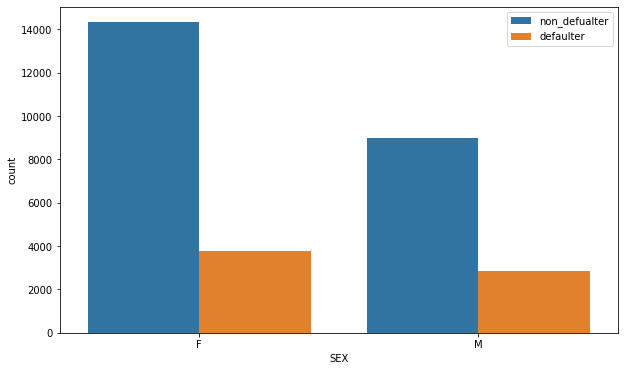

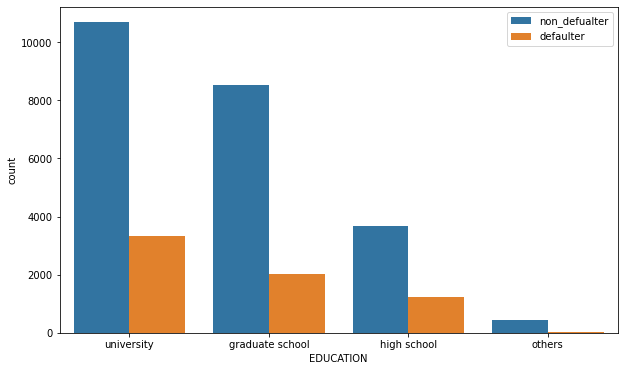

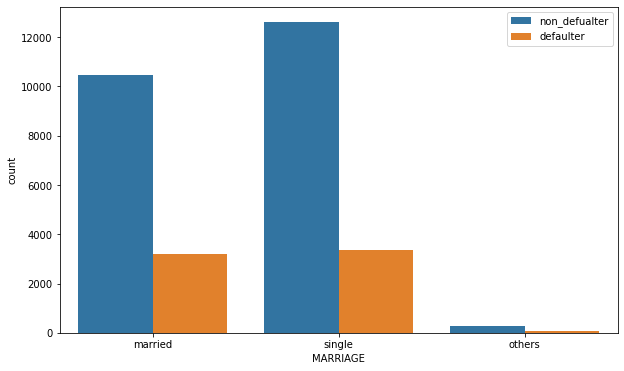

In [24]:
for col in categorical_features:
  plt.figure(figsize=(10,6))
  sns.countplot(x=col , hue='default_payment' , data=df_new)
  plt.legend(['non_defualter', 'defaulter'])
  plt.show()

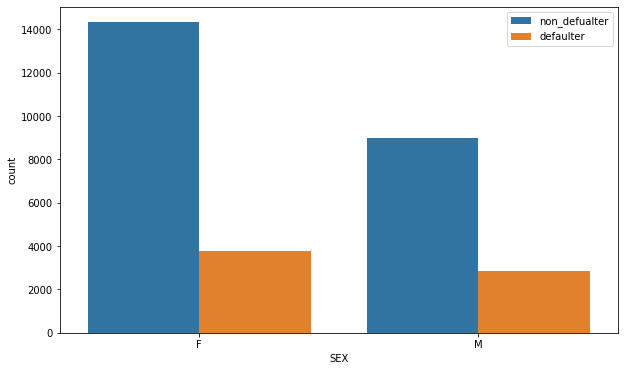

In [ ]:
# sex to default_payment
plt.figure(figsize=(10,6))
sns.countplot(x='SEX' , hue='default_payment' , data=df_new)
plt.legend(['non_defualter', 'defaulter'])
plt.show()

In [ ]:
df_new.groupby('SEX')['default_payment'].value_counts(normalize=True)

SEX  default_payment
F    0                  0.792107
     1                  0.207893
M    0                  0.758380
     1                  0.241620
Name: default_payment, dtype: float64

**So about male and female we can  say that though count of female defaluters is more but male has more ratio of default payments**

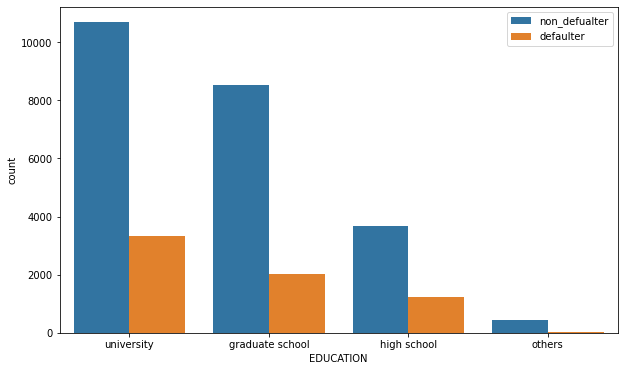

In [ ]:
# lets see how educational categories are realted to defualt payments
plt.figure(figsize=(10,6))
sns.countplot(x='EDUCATION' , hue='default_payment' , data=df_new)
plt.legend(['non_defualter', 'defaulter'])
plt.show()

In [ ]:
df_new.groupby('EDUCATION')['default_payment'].value_counts(normalize=True)

EDUCATION        default_payment
graduate school  0                  0.807630
                 1                  0.192370
high school      0                  0.748321
                 1                  0.251679
others           0                  0.929487
                 1                  0.070513
university       0                  0.762608
                 1                  0.237392
Name: default_payment, dtype: float64

* As we can see university students are maximum defualters but ratio of more defualters is of high school students 

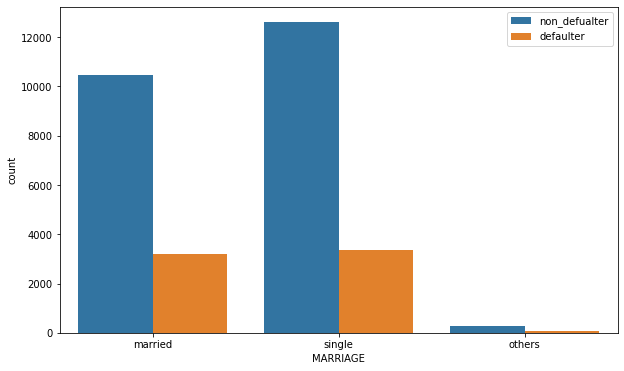

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='MARRIAGE' , hue='default_payment' , data=df_new)
plt.legend(['non_defualter', 'defaulter'])
plt.show()

In [ ]:
df_new.groupby('MARRIAGE')['default_payment'].value_counts(normalize=True)

MARRIAGE  default_payment
married   0                  0.765374
          1                  0.234626
others    0                  0.763926
          1                  0.236074
single    0                  0.790530
          1                  0.209470
Name: default_payment, dtype: float64

* Singles have more proportion of defulaters thats why it is rightly said singles are of no use

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


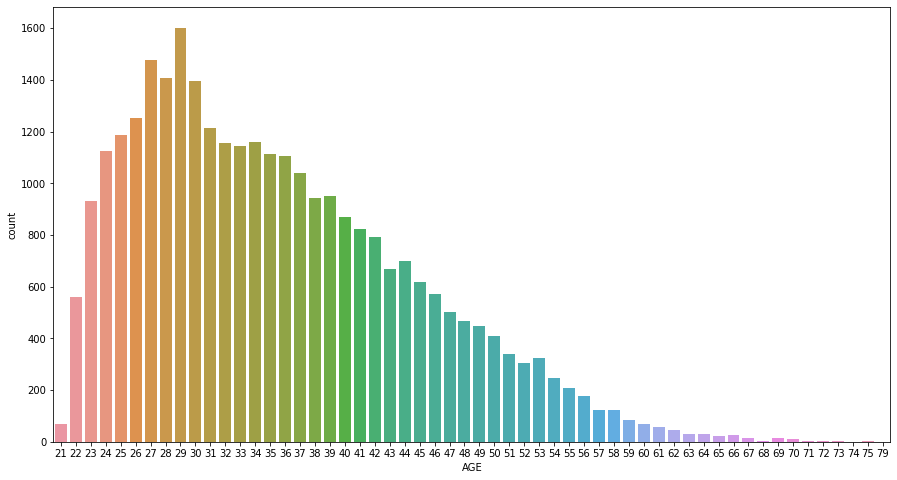

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(df['AGE'], data=df)


Age 27-30 looks maximum credit card holders then gradully decreases and after 60 is quite negligible

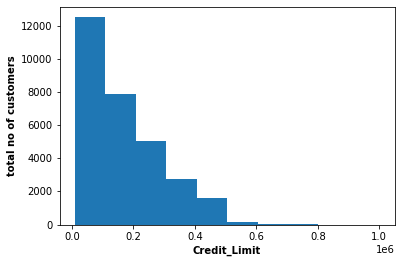

In [ ]:

# Use histogram to view the distribution of credit limit

plt.hist(df["LIMIT_BAL"])
plt.xlabel('Credit_Limit', fontweight='bold')
plt.ylabel('total no of customers', fontweight='bold')
plt.show()

Amount of bill statement ie bill amount in dollers

In [25]:
bill_amount_df = df[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']]

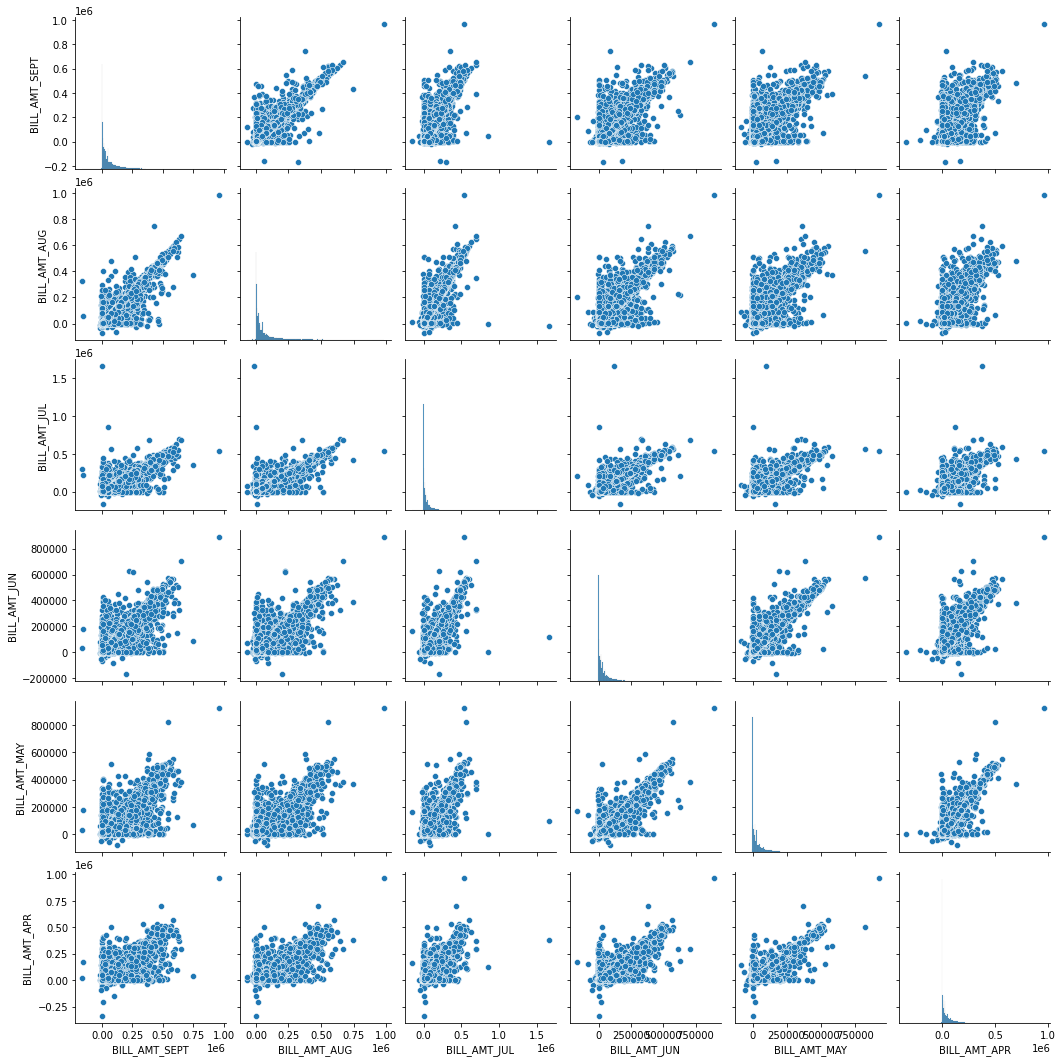

In [ ]:
sns.pairplot(data=bill_amount_df)

* Lets see history payments with defaulters

In [26]:
history_payment_cols = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']


In [27]:
df['PAY_SEPT'].value_counts()

 0    14737
-1     5682
 1     3667
-2     2750
 2     2666
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_SEPT, dtype: int64

**Here 1,2,3,4 etc specify about the dealy in payment monthly like 1 month delay 2 month delay etc and negetive represents payments are done on time and 0 is use of revolving credit**



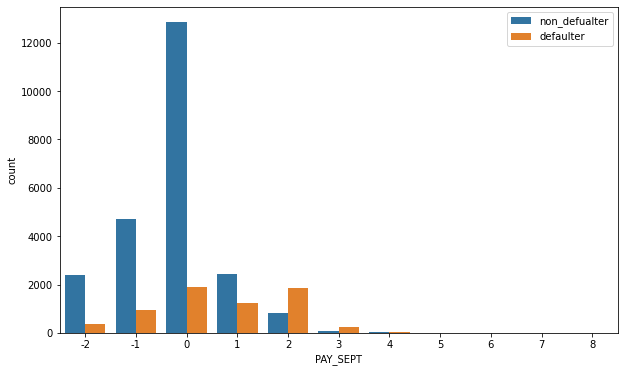

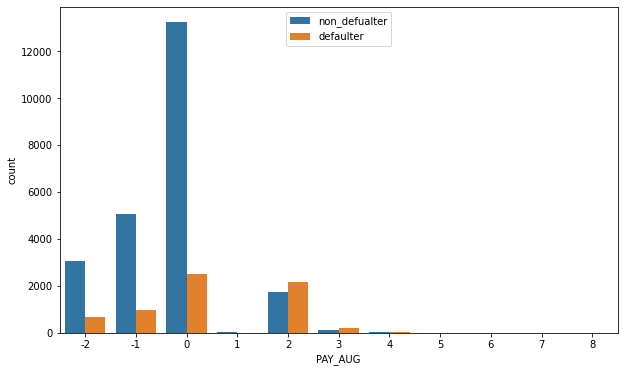

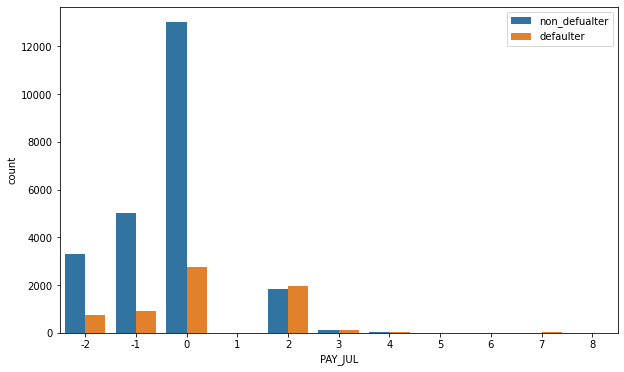

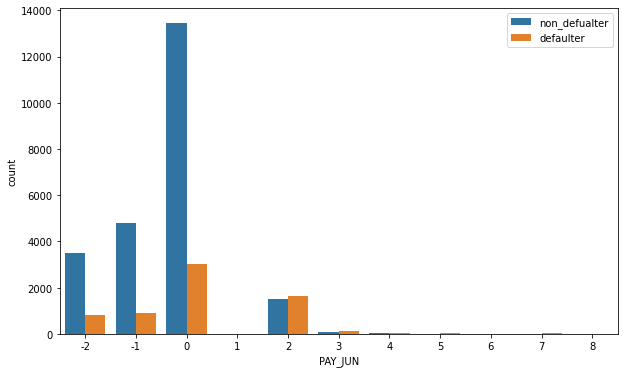

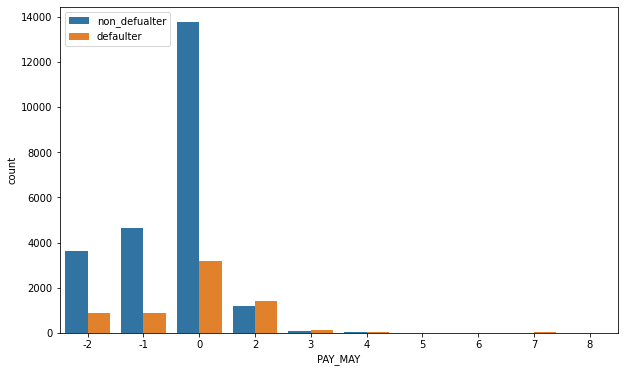

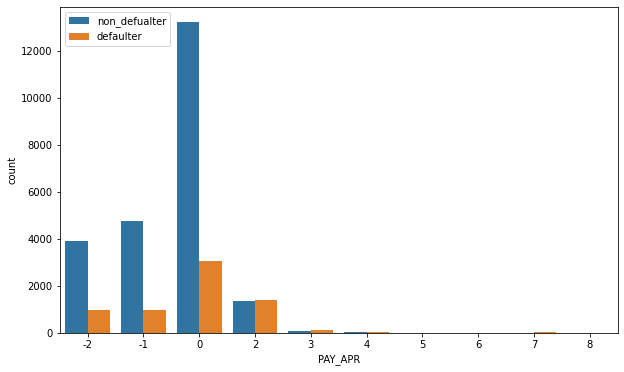

In [ ]:
for col in history_payment_cols:
  plt.figure(figsize=(10,6))
  sns.countplot(x=col , hue='default_payment' , data=df)
  plt.legend(['non_defualter', 'defaulter'])
plt.show()

Here maximum are using the revolving credit and maximum defaulters are delaying payment after 2 months

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


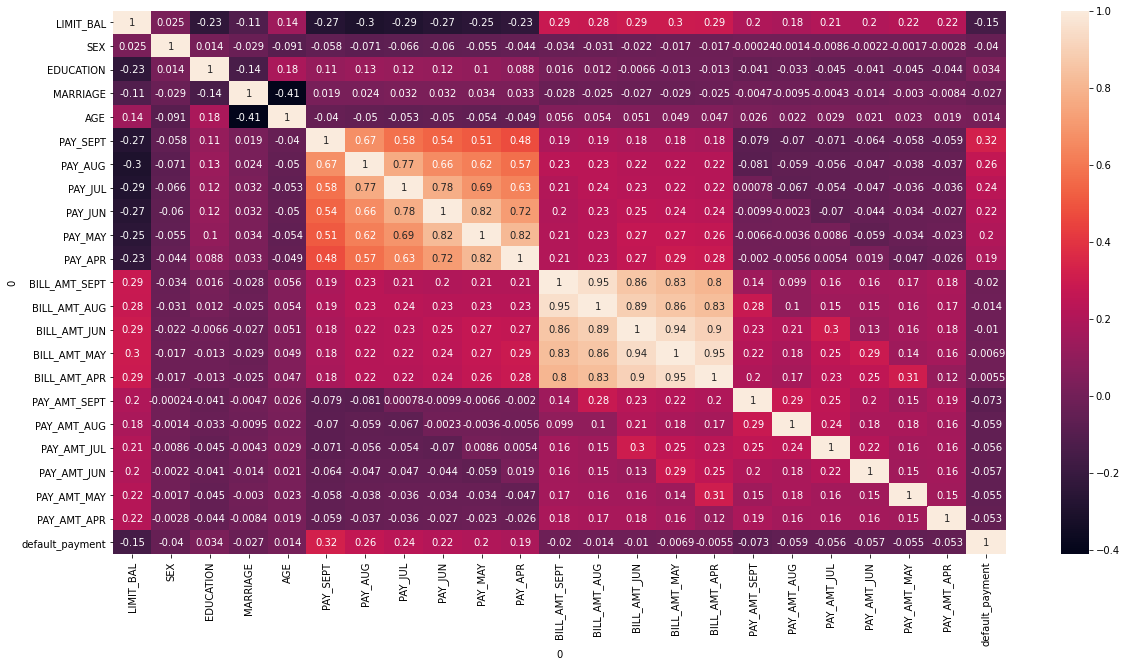

In [ ]:
plt.figure(figsize=(20,10))
corr = df.corr()
sns.heatmap(corr , annot=True)

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,20940,19146,19131,2000,36681,10000,9000,689,679,0


we can see some high corelations but cannot remove them as they might be important

**As we saw it is a imbalance dataset so we will be using SMOTE (Synthetic Minority Oversampling Technique) , As it clearly says it is a oversampling it means we will add into minority class with some minor changes**

In [28]:
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc , classification_report


separating dependent and independent features

In [29]:
X = df.drop(['default_payment'] , axis=1)
y = df['default_payment']

**Using standard scaler to scale the values**

In [30]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


**Here for inbalance dataset we have used smote**

In [31]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['default_payment'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))
    

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original dataset shape 29965
Resampled dataset shape 46670


**Train test split**

In [32]:
X_train,X_test,y_train,y_test = train_test_split(x_smote,y_smote,random_state=42, test_size = 0.33 , stratify = y_smote)

print(X_train.shape,  y_train.shape)

(31268, 23) (31268,)


As we have done necessary one hot encoding above 

**Get dummies**

In [33]:
df=df.astype('int64')

In [34]:
df = pd.get_dummies(data=df , columns=['SEX'] , drop_first=True)

In [ ]:
df.shape

(29965, 25)

In [ ]:
df.head()

,LIMIT_BAL,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment,EDUCATION_2,EDUCATION_3,EDUCATION_4,SEX_2
0,20000,1,24,2,2,-1,-1,-2,-2,3913,3102,0,0,0,0,689,0,0,0,0,1,1,0,0,1
1,120000,2,26,-1,2,0,0,0,2,2682,1725,3272,3455,3261,0,1000,1000,1000,0,2000,1,1,0,0,1
2,90000,2,34,0,0,0,0,0,0,29239,14027,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,1,0,0,1
3,50000,1,37,0,0,0,0,0,0,46990,48233,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,1,0,0,1
4,50000,1,57,-1,0,-1,0,0,0,8617,5670,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,0


**Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
param_grid = {'penalty':['l1','l2'] , 'C':[0.001, 0.01,0.1,1,5,10,50,100]}
log_reg = LogisticRegression()
grid_logistic = GridSearchCV(log_reg ,param_grid , scoring='accuracy' , verbose=3, n_jobs=-1,  cv= 3)


In [ ]:
grid_logistic.fit(X_train , y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    6.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=3)

In [ ]:
grid_logistic.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [ ]:
# y train predicted 
y_train_predicted = grid_logistic.predict(X_train)

In [ ]:
# y test predicted
y_test_predicted = grid_logistic.predict(X_test)

In [ ]:
# accuracy score of train set and test set
print("train accuracy for logistic regression is :",accuracy_score(y_train , y_train_predicted))
print("test accuracy for logistic regression is :", accuracy_score(y_test , y_test_predicted))

train accuracy for logistic regression is : 0.6201547908404759
test accuracy for logistic regression is : 0.6238150889494871


In [ ]:
print('train recall for logistic regression is :',recall_score(y_train, y_train_predicted))
print('test recall for logistic regression is :',recall_score(y_test, y_test_predicted))

train recall for logistic regression is : 0.590763720097224
test recall for logistic regression is : 0.5942085443448902


In [ ]:
print('train precision for logistic regression is :',precision_score(y_train, y_train_predicted))
print('test precision for logistic regression is :',precision_score(y_test, y_test_predicted))

train precision for logistic regression is : 0.6276588515120626
test precision for logistic regression is : 0.631608005521049


In [ ]:
# confusion metrix for train and test

print("confusion metrix for train set is :"
,confusion_matrix(y_train , y_train_predicted))

print("confusion metrix for test set is :",
      confusion_matrix(y_test , y_test_predicted))




confusion metrix for train set is : [[10155  5479]
 [ 6398  9236]]
confusion metrix for test set is : [[5032 2669]
 [3125 4576]]


In [ ]:
print(classification_report(y_train,y_train_predicted))
print(classification_report(y_test , y_test_predicted))

              precision    recall  f1-score   support

           0       0.61      0.65      0.63     15634
           1       0.63      0.59      0.61     15634

    accuracy                           0.62     31268
   macro avg       0.62      0.62      0.62     31268
weighted avg       0.62      0.62      0.62     31268

              precision    recall  f1-score   support

           0       0.62      0.65      0.63      7701
           1       0.63      0.59      0.61      7701

    accuracy                           0.62     15402
   macro avg       0.62      0.62      0.62     15402
weighted avg       0.62      0.62      0.62     15402



In [ ]:
# model evalution of logistic regresssion
logistic_accuracy =  accuracy_score(y_test , y_test_predicted)
logistic_test_precision = precision_score(y_test,y_test_predicted)
logistic_test_recall = precision_score(y_test,y_test_predicted)
logistic_test_f1 = f1_score(y_test,y_test_predicted)
logistic_test_roc_auc=  roc_auc_score(y_test,y_test_predicted)
logistic_test_confusion_matrix = confusion_matrix(y_test,y_test_predicted)

In [ ]:
logistic_df = pd.DataFrame([['logistic_regression' ,logistic_accuracy, logistic_test_precision,logistic_test_recall,
                             logistic_test_f1,logistic_test_roc_auc,logistic_test_confusion_matrix ]], 
                           columns=['model', 'accuracy', 'precision', 'recall' , 'f1_score', 'roc-auc', 'confusion_matrix'])

In [ ]:
logistic_df

,model,accuracy,precision,recall,f1_score,roc-auc,confusion_matrix
0,logistic_regression,0.623815,0.631608,0.631608,0.612338,0.623815,"[[5032, 2669], [3125, 4576]]"


**Random forest classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier()

In [ ]:
param_grid = {'n_estimators':[50,100,150] , 'max_depth':[15,25,35]}

In [ ]:
classifier = GridSearchCV(rf_classifier, param_grid=param_grid, scoring= 'recall', n_jobs=-1, cv =3, verbose=2)
classifier.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [120]:
rf_features = classifier.best_estimator_


In [112]:
classifier.best_params_

{'max_depth': 25, 'n_estimators': 150}

In [113]:
classifier.best_score_

0.8065115050963438

In [114]:
# predicted classes of classifier
y_train_rf_predicted = classifier.predict(X_train)
y_test_rf_predicted = classifier.predict(X_test)

In [116]:
# accuracy of test and train
print(accuracy_score(y_train,y_train_rf_predicted ))
print(accuracy_score(y_test_rf_predicted,y_test))

0.9979851605475246
0.8335281132320478


In [118]:
print(recall_score(y_train , y_train_rf_predicted))
print(recall_score(y_test, y_test_rf_predicted))

0.9993603684277856
0.8197636670562265


In [121]:
rf_features.feature_importances_

array([0.05776785, 0.03146894, 0.02706057, 0.03406423, 0.05220289,
       0.07928736, 0.05561844, 0.03519518, 0.02465658, 0.02519158,
       0.02200746, 0.06142143, 0.05263851, 0.0484378 , 0.0463692 ,
       0.04608725, 0.05740048, 0.05366738, 0.05230303, 0.04629639,
       0.04328957, 0.04756787])

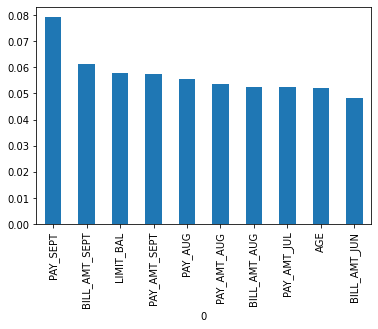

In [123]:
# graph of feature importance 
(pd.Series(rf_features.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='bar')) 

[Text(0, 0.5, 'not_defaluter'), Text(0, 1.5, 'defaluter')]

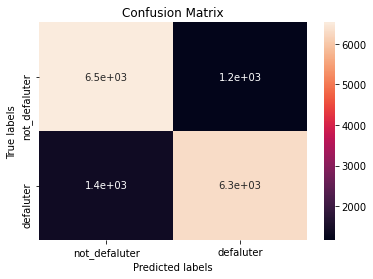

In [126]:
labels = ['not_defaluter' , 'defaluter']
cm = confusion_matrix(y_test,y_test_rf_predicted)
ax = plt.subplot()
sns.heatmap(cm,annot=True, ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


**svm implementation**

In [127]:
from sklearn.svm import SVC

In [130]:
svc = SVC()

In [133]:
param_grid = {'C':[0.1,0.5,1,10,50,100], 'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']}

In [ ]:
svm_grid = GridSearchCV(svc,param_grid,scoring='accuracy',n_jobs=-1,cv=5,verbose=2)
svm_grid.fit(X_train,y_train)

In [135]:
svc = SVC(C=10,kernel='rbf')

In [136]:
svc.fit(X_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [137]:
# predict classes
y_svc_train_pred = svc.predict(X_train)
y_svc_test_pred = svc.predict(X_test)

In [138]:
# accuracy scores 
print(accuracy_score(y_train,y_svc_train_pred))
print(accuracy_score(y_test,y_svc_test_pred))

0.6469553537162595
0.6380340215556422


In [139]:
# recall scores 
print(recall_score(y_train,y_svc_train_pred))
print(recall_score(y_test,y_svc_test_pred))

0.8243571702699245
0.8205427866510843


In [140]:
# precision scores 
print(precision_score(y_train,y_svc_train_pred))
print(precision_score(y_test,y_svc_test_pred))

0.608469855058779
0.6011225266362252


**XGBoost classifier**

In [35]:
from xgboost import XGBClassifier

In [36]:
param_grid ={'n_estimators': [50,100,150],
            'max_depth': [4,7,9],
            'learning_rate': [0.1,0.2,0.5,1], 
            'min_child_weight': [1,2,3]
            }


In [37]:
xgb = GridSearchCV(XGBClassifier(),param_grid=param_grid, scoring = 'accuracy', cv=3, verbose=2)
xgb.fit(X_train,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=50, total=   2.0s
[CV] learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=50, total=   1.7s
[CV] learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=50 
[CV]  learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=50, total=   1.7s
[CV] learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, total=   3.3s
[CV] learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, total=   3.3s
[CV] learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, total=   3.3s
[CV] learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=1050 
[CV]  learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=1050, total=  31.4s
[CV] learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=1050 
[CV]  lear

[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed: 106.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.2, 0.5, 1],
                         'max_depth': [4, 7, 9], 'min_child_weight': [1, 2, 3],
                         'n_estimat

In [45]:
xgb = XGBClassifier(learning_rate=0.1,max_depth=9,min_child_weight=1,n_estimators=150)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [39]:
xgb.best_params_

{'learning_rate': 0.1,
 'max_depth': 9,
 'min_child_weight': 1,
 'n_estimators': 1050}

In [47]:
# prdicted values
y_train_xgb_pred = xgb.predict(X_train)
y_test_xgb_pred =  xgb.predict(X_test)

In [48]:
# accuracy scores 
print(accuracy_score(y_train,y_train_xgb_pred))
print(accuracy_score(y_test,y_test_xgb_pred))

0.950396571574773
0.829892221789378


In [49]:
# recall scores 
print(recall_score(y_train,y_train_xgb_pred))
print(recall_score(y_test,y_test_xgb_pred))

0.9384674427529743
0.7998961173873523


In [51]:
cm = confusion_matrix(y_test,y_test_xgb_pred)

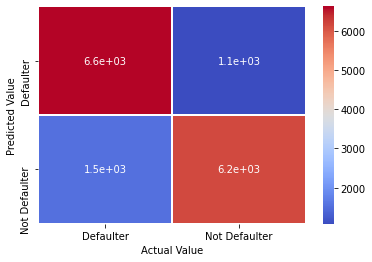

In [52]:
labels = ['Defaulter', 'Not Defaulter']
ax= plt.subplot()
sns.heatmap(cm, annot= True, linewidths=1, cmap='coolwarm', ax= ax)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()